# Bikeshare数据集上的特征工程

1、	任务描述
请在Capital Bikeshare （美国Washington, D.C.的一个共享单车公司）提供的自行车数据上进行回归分析。根据每天的天气信息，预测该天的单车共享骑行量。

原始数据集地址：http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
1)	文件说明
day.csv: 按天计的单车共享次数（作业只需使用该文件）
hour.csv: 按小时计的单车共享次数（无需理会）
readme：数据说明文件

2)	字段说明
Instant记录号
Dteday：日期
Season：季节（1=春天、2=夏天、3=秋天、4=冬天）
yr：年份，(0: 2011, 1:2012)
mnth：月份( 1 to 12)
hr：小时 (0 to 23)  （只在hour.csv有，作业忽略此字段）
holiday：是否是节假日
weekday：星期中的哪天，取值为0～6
workingday：是否工作日
1=工作日 （是否为工作日，1为工作日，0为非周末或节假日
weathersit：天气（1：晴天，多云 2：雾天，阴天 3：小雪，小雨 4：大雨，大雪，大雾）
temp：气温摄氏度
atemp：体感温度
hum：湿度
windspeed：风速
casual：非注册用户个数
registered：注册用户个数
cnt：给定日期（天）时间（每小时）总租车人数，响应变量y （cnt = casual + registered）

casual、registered和cnt三个特征均为要预测的y，作业里只需对cnt进行预测

## 导入必要的工具包

In [187]:
# 数据读取及基本处理
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 读入数据

数据预处理对训练数据和测试数据需进行同样处理，因此将二者一起读入

In [188]:
# 读入数据
train = pd.read_csv("day.csv")
train.head()
#print("train : " + str(train.shape))

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [189]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


没有缺失数据

## 数据探索

In [190]:
#对数据值型特征，用常用统计量观察其分布
train.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [191]:
#对类别型特征，观察其取值范围及直方图
categorical_features = ['season','mnth','weathersit','weekday']
for col in categorical_features:
    print('\n%s属性的不同取值和出现的次数'%col)
    print(train[col].value_counts())
    train[col] = train[col].astype('object')


season属性的不同取值和出现的次数
3    188
2    184
1    181
4    178
Name: season, dtype: int64

mnth属性的不同取值和出现的次数
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64

weathersit属性的不同取值和出现的次数
1    463
2    247
3     21
Name: weathersit, dtype: int64

weekday属性的不同取值和出现的次数
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64


类别型特征的取值不多
类别型特征可以采用独热编码（One hot encoding）/哑编码

## 特征工程

In [192]:
categorical_features = ['season','mnth','weathersit','weekday']
x_train_cat = train[categorical_features]
x_train_cat = pd.get_dummies(x_train_cat)
x_train_cat.head()

,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weathersit_1,weathersit_2,weathersit_3,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [193]:
#数值型变量预处理
from sklearn.preprocessing import MinMaxScaler
mn_x = MinMaxScaler()
numerical_features = ['temp','atemp','hum','windspeed']
temp = mn_x.fit_transform(train[numerical_features])

x_train_num = pd.DataFrame(data=temp, columns=numerical_features, index =train.index)
x_train_num.head()

,temp,atemp,hum,windspeed
0,0.355170,0.373517,0.828620,0.284606
1,0.379232,0.360541,0.715771,0.466215
2,0.171000,0.144830,0.449638,0.465740
3,0.175530,0.174649,0.607131,0.284297
4,0.209120,0.197158,0.449313,0.339143


In [194]:
# Join categorical and numerical features
x_train = pd.concat([x_train_cat, x_train_num, train['holiday'],  train['workingday']], axis = 1, ignore_index=False)
x_train.head()

,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weekday_3,weekday_4,weekday_5,weekday_6,temp,atemp,hum,windspeed,holiday,workingday
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0.355170,0.373517,0.828620,0.284606,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.379232,0.360541,0.715771,0.466215,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.171000,0.144830,0.449638,0.465740,0,1
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.175530,0.174649,0.607131,0.284297,0,1
4,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0.209120,0.197158,0.449313,0.339143,0,1


In [195]:
FE_train = pd.concat([train['instant'], x_train,  train['yr'],train['cnt']], axis = 1)
FE_train.to_csv('FE_day.csv', index=False)
FE_train.tail()

,instant,season_1,season_2,season_3,season_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,...,weekday_5,weekday_6,temp,atemp,hum,windspeed,holiday,workingday,yr,cnt
726,727,1,0,0,0,0,0,0,0,0,...,0,0,0.243025,0.193709,0.671380,0.675656,0,1,1,2114
727,728,1,0,0,0,0,0,0,0,0,...,1,0,0.241986,0.230993,0.606684,0.274350,0,1,1,3095
728,729,1,0,0,0,0,0,0,0,0,...,0,1,0.241986,0.214393,0.774208,0.210260,0,0,1,1341
729,730,1,0,0,0,0,0,0,0,0,...,0,0,0.245101,0.200348,0.497001,0.676936,0,0,1,1796
730,731,1,0,0,0,0,0,0,0,0,...,0,0,0.195259,0.189567,0.593830,0.273062,0,1,1,2729


In [196]:
FE_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 35 columns):
instant         731 non-null int64
season_1        731 non-null uint8
season_2        731 non-null uint8
season_3        731 non-null uint8
season_4        731 non-null uint8
mnth_1          731 non-null uint8
mnth_2          731 non-null uint8
mnth_3          731 non-null uint8
mnth_4          731 non-null uint8
mnth_5          731 non-null uint8
mnth_6          731 non-null uint8
mnth_7          731 non-null uint8
mnth_8          731 non-null uint8
mnth_9          731 non-null uint8
mnth_10         731 non-null uint8
mnth_11         731 non-null uint8
mnth_12         731 non-null uint8
weathersit_1    731 non-null uint8
weathersit_2    731 non-null uint8
weathersit_3    731 non-null uint8
weekday_0       731 non-null uint8
weekday_1       731 non-null uint8
weekday_2       731 non-null uint8
weekday_3       731 non-null uint8
weekday_4       731 non-null uint8
weekday_5       731 

In [197]:
y = FE_train['cnt'].values
X = FE_train.drop('cnt',axis=1)

columns=X.columns

In [198]:
#分割百分之二十做为训练集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=5,test_size=0.2)

In [199]:
#数据标准化
from sklearn.preprocessing import StandardScaler

#初始化标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()

#标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

y_train=ss_y.fit_transform(y_train.reshape(-1,1))
y_test=ss_y.transform(y_test.reshape(-1,1))

/home/danke/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### OLS

In [200]:
#OLS
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#训练
lr.fit(X_train,y_train)
#predict
y_test_pred_lr = lr.predict(X_test)
y_train_pred_lr = lr.predict(X_train)
#查看权重系数的绝对值
fs = pd.DataFrame({"columns":list(columns),"coef":list((lr.coef_.T))})
fs.sort_values(by=['coef'],ascending=False)

,columns,coef
33,yr,[1.1160632869856548]
27,temp,[0.3011059906004262]
13,mnth_9,[0.1559295162200118]
4,season_4,[0.14796117988110521]
14,mnth_10,[0.11543219067265924]
28,atemp,[0.11089495761863181]
16,mnth_12,[0.09738994655567887]
17,weathersit_1,[0.0759529444880797]
15,mnth_11,[0.07457958463053335]
12,mnth_8,[0.046438754001006916]


In [201]:
#rmse评价
from sklearn.metrics import mean_squared_error as rmse
print('The rmse of LinearRegression on test is '+str(rmse(y_test,y_test_pred_lr)))
print('The rmse of LinearRegression on train is '+str(rmse(y_train,y_train_pred_lr)))

The rmse of LinearRegression on test is 0.15929158674670052
The rmse of LinearRegression on train is 0.1519280943673662


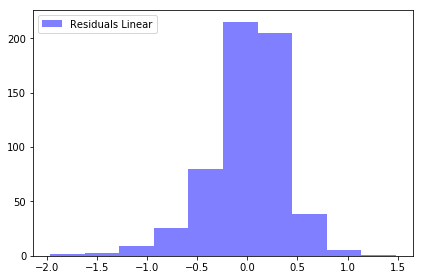

In [202]:
#观测残差分布
f,ax= plt.subplots()
f.tight_layout()
ax.hist(y_train - y_train_pred_lr,label = 'Residuals Linear',color = 'b' ,alpha=.5)
ax.legend(loc='best')
#感觉分布的可以啊……

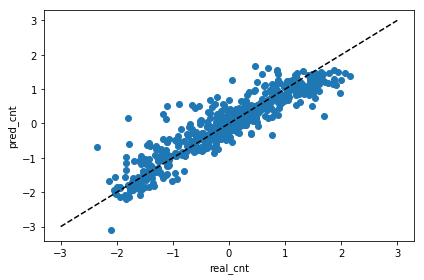

In [203]:
#观察散点图
plt.figure()
plt.scatter(y_train,y_train_pred_lr)
plt.plot([-3,3],[-3,3],'--k')
plt.axis('tight')
plt.xlabel('real_cnt')
plt.ylabel('pred_cnt')
plt.tight_layout()

In [204]:
#随机梯度下降优化模型
from sklearn.linear_model import SGDRegressor

#迭代次数
sgdr = SGDRegressor(max_iter=1000)

#训练
sgdr.fit(X_train,y_train)

#预测
sgdr_pred_test = sgdr.predict(X_test)

sgdr.coef_

/home/danke/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.03275659, -0.18851324,  0.01762907,  0.02052668,  0.14877141,
       -0.04309387, -0.02699856,  0.03284725,  0.01941395,  0.05143658,
        0.01749324, -0.04741745,  0.00224985,  0.08374704,  0.01681005,
       -0.05429843, -0.05445695,  0.07474368, -0.02748515, -0.14054956,
       -0.05153627, -0.02268075, -0.0011755 ,  0.00835745,  0.00450269,
        0.01752547,  0.04501568,  0.27737531,  0.13186778, -0.12811446,
       -0.12400019, -0.02766434,  0.01462565,  0.49808494])

In [205]:
print('The value of default measurement of SGDRegressor on test is '+str(rmse(y_test,y_test_pred_lr)))
print('The value of default measurement of SGDRegressor on train is '+str(rmse(y_train,y_train_pred_lr)))

The value of default measurement of SGDRegressor on test is 0.15929158674670052
The value of default measurement of SGDRegressor on train is 0.1519280943673662


### RidgeRegression

In [206]:
from sklearn.linear_model import RidgeCV

#设置超参数
alphas = [0.01,0.1,1,10,100]

#生成RidgeCV实例
ridge = RidgeCV(alphas = alphas,cv=5)
#训练
ridge.fit(X_train,y_train)
#预测
y_test_pred_ridge = ridge.predict(X_test)
y_train_pred_ridge = ridge.predict(X_train)

#评估
print('The rmse of RidgeCV on test is'+str(rmse(y_test, y_test_pred_ridge)))
print('The rmse of RidgeCV on train is'+str(rmse(y_train, y_train_pred_ridge)))

The rmse of RidgeCV on test is0.16124086793216308
The rmse of RidgeCV on train is0.15347569821595683


In [207]:
#查看系数
fs = pd.DataFrame({"columns":list(columns),"coef_lr":list((lr.coef_.T)),"coef_ridge":list((ridge.coef_.T))})
fs.sort_values(by=["coef_lr"],ascending=False)

,columns,coef_lr,coef_ridge
33,yr,[1.1160632869856548],[0.3573810906453787]
27,temp,[0.3011059906004262],[0.2173457174727175]
13,mnth_9,[0.1559295162200118],[0.07399057972897441]
4,season_4,[0.14796117988110521],[0.13237930271252446]
14,mnth_10,[0.11543219067265924],[0.0036301361656273247]
28,atemp,[0.11089495761863181],[0.17416902361127512]
16,mnth_12,[0.09738994655567887],[-0.08551471760006173]
17,weathersit_1,[0.0759529444880797],[0.07552886809230103]
15,mnth_11,[0.07457958463053335],[-0.07510175291625916]
12,mnth_8,[0.046438754001006916],[0.001276302192992839]


### Lasso

In [208]:
from sklearn.linear_model import LassoCV

#一个lasso实例
lasso = LassoCV(alphas=alphas,cv=5)
#训练
lasso.fit(X_train,y_train)
#测试
y_test_pred_lasso = lasso.predict(X_test)
y_train_pred_lasso = lasso.predict(X_train)

print('The rmse of LassoCV on test is'+str(rmse(y_test, y_test_pred_lasso)))
print('The rmse of LassoCV on train is'+str(rmse(y_train, y_train_pred_lasso)))

The rmse of LassoCV on test is0.16924233196415664
The rmse of LassoCV on train is0.155420863110794


/home/danke/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


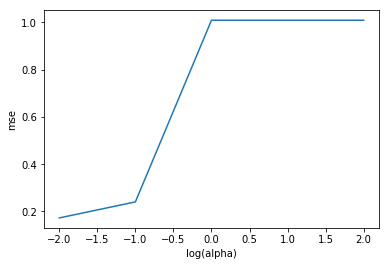

alpha is: 0.01


,columns,coef_lr,coef_ridge,coef_lasso
33,yr,[1.1160632869856548],[0.3573810906453787],0.520216
27,temp,[0.3011059906004262],[0.2173457174727175],0.272258
13,mnth_9,[0.1559295162200118],[0.07399057972897441],0.082780
4,season_4,[0.14796117988110521],[0.13237930271252446],0.047580
14,mnth_10,[0.11543219067265924],[0.0036301361656273247],0.050414
28,atemp,[0.11089495761863181],[0.17416902361127512],0.131968
16,mnth_12,[0.09738994655567887],[-0.08551471760006173],-0.007719
17,weathersit_1,[0.0759529444880797],[0.07552886809230103],0.100444
15,mnth_11,[0.07457958463053335],[-0.07510175291625916],-0.000000
12,mnth_8,[0.046438754001006916],[0.001276302192992839],-0.000000


In [210]:
mses = np.mean(lasso.mse_path_, axis = 1)
plt.plot(np.log10(lasso.alphas_), mses) 
#plt.plot(np.log10(lasso.alphas_)*np.ones(3), [0.3, 0.4, 1.0])
plt.xlabel('log(alpha)')
plt.ylabel('mse')
plt.show()    
            
print ('alpha is:', lasso.alpha_)

# 看看各特征的权重系数，系数的绝对值大小可视为该特征的重要性
fs = pd.DataFrame({"columns":list(columns), "coef_lr":list((lr.coef_.T)), "coef_ridge":list((ridge.coef_.T)), "coef_lasso":list((lasso.coef_.T))})
fs.sort_values(by=['coef_lr'],ascending=False)

  rmse_OLS_in_test:0.15929158674670052
  
rmse_ridge_in_test:0.16124086793216308

rmse_lasso_in_test:0.16924233196415664

从在测试集的性能来看，OLS>ridge>lasso

ridge和lasso分别使用L2和L1正则，由rmse表现可见，ridge和lasso都有些过拟合，在训练集的表现灭有OLS好